In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random

from TurkishStemmer import TurkishStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

# Data exploration, first pass: more cleaning functions
This section creates a column with ads and whitespace removed (`fixed_text`) and a column with Turkish stopwords removed and words stemmed according to the `TurkishStemmer()` function (`processed_text`). These functions are added to the cleaning script. 

In [ ]:
df = pd.read_csv('assets/lyrics/lyrics_scraped_20180621-134937.csv', index_col = 0)

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
        1. Tokenizes and removes punctuation
        2. Removes stopwords
        3. Stems
        4. Returns a list of the cleaned text
    '''
    if pd.isnull(text):
        return []
    # tokenizing and removing punctuation
    tokenizer = RegexpTokenizer(r'\w+')
    text_processed=tokenizer.tokenize(text)
    
    # removing any stopwords
    text_processed = [word.lower() for word in text_processed if word.lower() not in stopwords.words('turkish')]
    
    # stemming
    stemmer = TurkishStemmer()
    
    text_processed = [stemmer.stem(word) for word in text_processed]
    
    try:
        text_processed.remove('b')
    except: 
        pass

    return " ".join(text_processed) ## <-- we're keeping our words distinct

In [ ]:
test_text = df['text'][34]

In [ ]:
text_process(test_text)

In [ ]:
df['processed_text'] = df['text'].map(text_process)

In [ ]:
df['processed_text']
df['num_words'] = [len(x) for x in df['text'].str.split(" ")]

In [ ]:
df.loc[1,['text', 'num_words']]['num_words']

In [ ]:
df.sort_values('num_words', ascending=False)

In [ ]:
test = df.loc[1246, 'text']

In [ ]:
test

In [ ]:
pattern = r'(eval.*])'

In [ ]:
test = re.sub(pattern, "", test)
test = re.sub(r"\s+", " ", test)
test

In [31]:
def remove_ads(text):
    pattern = r'(eval.*])'
    return re.sub(pattern, "", text)

def regularize_whitespace(text):
    whitepattern = r'\s+'
    return re.sub(whitepattern, " ", text)

def remove_and_reg(text):
    text = remove_ads(text)
    text = regularize_whitespace(text)
    return text

In [ ]:
df['fixed_text'] = df['text'].map(remove_and_reg)

In [ ]:
df['fixed_text']

In [ ]:
df[df['title'].str.find('Dost') > 0]

In [ ]:
df.loc[1287, 'fixed_text'].strip()

In [ ]:
df.loc[1287, 'text']

In [ ]:
df[df['text'].str.contains(" les")]['text']

In [ ]:
df.loc[449, 'fixed_text'].strip()

In [ ]:
df.loc[449, 'text'].strip()

In [ ]:
df[(df['artist'] == 'Candan Erçetin') & df['album'].str.contains("Aranjman")]

In [ ]:
df.loc[1313,'text'].strip()

In [ ]:
df.loc[1313, 'title']

In [ ]:
for text in df.loc[1310:1320, 'fixed_text']:
    print(text)
    print('_-----_')

In [ ]:
re.sub(r'[^A-Za-z ]', "", df.loc[1313,'text'])

In [ ]:
set(df.loc[1313,'text'].strip().lower().split(" "))

# Playing with word2vec

In [ ]:
from gensim.models import word2vec

In [ ]:
f = "assets/lyrics/lyrics_scraped_20180621-134937.csv"
df = pd.read_csv(f, index_col=0)

In [ ]:
df.shape

In [ ]:
df['artist'].value_counts()

In [ ]:
num_features = 400    # Word vector dimensionality                      
min_word_count = 15   # Minimum word count (seems to mean that if a word appears less than this number ignore it)                        
num_workers = 4       # Number of threads to run in parallel
context = 4          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

In [ ]:
text = df['text'].map(remove_and_reg)

In [ ]:
text = [i.lower().split(" ") for i in text]

In [ ]:
model = word2vec.Word2Vec(text, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

In [ ]:
voc = list(model.wv.vocab.keys())

In [ ]:
voc

In [ ]:
model.wv.most_similar('çocuklar', topn=30)

# English testing

In [6]:
df = pd.read_csv('assets/test.csv')

In [8]:
df.columns = ['artist','title','album','text']

In [24]:
def check_for_english(text):
    text_words = text.split(" ")
    english_words = set(['I', "we're", "the", "an", "one", "to", "give", "love"])
    counter = 0
    for word in text_words:
        if word in english_words:
            counter += 1
    return counter
    

In [32]:
df['text'] = df['text'].map(remove_and_reg)

In [33]:
df['english_score'] = df['text'].map(check_for_english)

In [34]:
df[df['english_score'] == 0].shape

(348, 5)

In [35]:
df[df['english_score'] != 0].shape

(315, 5)

In [37]:
for i in df[df['english_score'] != 0]['text']:
    print(i)
    print("----------------")

Hey we're gonna be around Hey we're gonna work it out Hey there's nothing to fight about Today we're gonna be about You hardly know me, you say I'm your best friend Everything's ace, it'll work out in the end Say that you love us, I don't believe that you want me to stay You're hoping that I'll go away I'm gonna be around Hey I'm gonna work it out Hey there's plenty to fight about No way I'm ever going down 
----------------
Afterburner, after burning out, There's a news alert in ??, And some poor kid who drowned. Operator, operating round, Could you take a chance in our romance, You did nothing about. Oooo ooo, Take it like a man and do without. Oooo ooo, It takes a century to figure out. Oooo ooo, Making like we know what its about. Oooo ooo, Talk about it. After burning out. After burning out. After burning out. Times when i've forgotten you're around. Ten years later, I can't believe its dead, What we lost you're in without it started coming round again. Space invader, Tried it on 

In [49]:
i = 0

In [51]:
i += 30
df[df['english_score'] > 1]['text'][i:i+30]


61     The way it started, I had no doubt, Your lips ...
62     Something's got to give, Something's got to gi...
63     Close your eyes and watch it all pass us as we...
64     This time I realize you're looking this way wi...
65     The pain that you have fought, the pain that y...
66     This is where the best act is in town like ash...
67     I've been trying and trying just to watch all ...
68     Get out the candlelight I'll strike the light ...
69     I've been to just about a million places, Sunn...
70     Every step that I want to take I'm told to hur...
71     Welcome to my dreamiest nightmare, Where you'r...
72     Let's get this on tonight We'll turn down all ...
73     Yeah, yeah, yeah, yeah Wipe down the combinati...
74     Your fingertips across my skin The palm trees ...
75     Don't know what to do anymore I've lost the on...
76     Thick as thieves the last of leaves In the win...
77     Come on, come out The weather is warm Come on,...
78     Stitch in your knitted b

In [41]:
df.loc[89, 'title']

'3 Porsiyon (Ft.Kurşun)'

# Testing to marry spotify data to cleaned thing
## 1\. Imports and functions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random

from TurkishStemmer import TurkishStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

def remove_ads(text):
    pattern = r'(eval.*])'
    return re.sub(pattern, "", text)

def regularize_whitespace(text):
    whitepattern = r'\s+'
    return re.sub(whitepattern, " ", text)

def remove_and_reg(text):
    text = remove_ads(text)
    text = regularize_whitespace(text)
    return text

def check_for_english(text):
    text_words = text.split(" ")
    english_words = set(['I', "we're", "the", "an", "one", "to", "give", "love"])
    counter = 0
    for word in text_words:
        if word in english_words:
            counter += 1
    return counter

## 2\. Reading in data
    - `spotify_df` is scraped from spotify, top hits, with a column for verification
    - `main_df` is scraped from alternatifim, with names, artists

In [12]:
spotify_df = pd.read_csv('../assets/lyrics_with_spotify.csv', index_col=0)
main_df = pd.read_csv('../assets/lyrics/all_lyrics_scraped_20180625-155423.csv', index_col = 0)

3\. Cleaning functions to main data

In [14]:
main_df['text'] = main_df['text'].map(remove_and_reg)
main_df['english_score'] = main_df['text'].map(check_for_english)
main_df = main_df[main_df['english_score'] == 0]

In [15]:
main_df.head(2)

,artist,title,album,text,english_score
89,A P O,"3 Büyükler (Ft. Yener, 9canlı)",galexsnake,9canlı Verse: Bana sordular sorular soruldu ce...,0
91,A P O,34 Kotak D,Compilation Vol. 1,Eypi Bana bi mermi ver bende kurşun var kurşun...,0


In [16]:
spotify_df.head(2)

,release,name,real_name
89,NaN,NaN,"3 Büyükler (Ft. Yener, 9canlı)"
91,NaN,NaN,34 Kotak D


## 4\. Joining the data together. They share an index, and the columns `real_data` and `title` should be exactly the same.

In [18]:
joined_df = pd.concat([main_df, spotify_df], axis=1)

## 5\. Getting rid of `NaN` rows and rows where the spotify name and real name aren't exactly the same
    In the spotify data, whenever a song couldn't be found, the script put a NaN into that slot. THe first step is to jsut remove that. In the future, if I decide to try other sources for year data, some of these slots could be filled. Until then I'm not going to worry about it.
    
    This might be overly conservative, and I might be missing data. My justification is that of course I'm missing 'data'. In the real world there are thousands of songs that aren't transcribed, thousands of dates that are unrecorded. I can try to do better, perhaps, but there is no such thing as "all the data" in this circumstance.

In [19]:
joined_df_no_nas = joined_df.dropna()

In [21]:
print(joined_df.shape)
print(joined_df_no_nas.shape)

(41943, 8)
(18665, 8)


In [26]:
mask = joined_df_no_nas['title'] == joined_df_no_nas['name']

In [27]:
mask.mean()

0.84066434503080634

In [29]:
joined_df_no_nas[mask].shape

(15691, 8)

In [30]:
joined_df_no_nas[mask].to_csv('../assets/lyrics/master_data_20180626.csv')

In [42]:
df = joined_df_no_nas[mask].copy()

In [43]:
times = pd.to_datetime(df['release'])

In [45]:
df.drop('real_name', axis = 1, inplace = True)

In [47]:
df.columns = ['artist_name', 'song_title', 'album_name', 'song_text', 'english_score', 'release_date', 'song_name']

In [49]:
df.drop('english_score', axis  =1, inplace=True)

In [50]:
df.head()

,artist_name,song_title,album_name,song_text,release_date,song_name
285,Abdal,Altın Yüzüğüm Kırıldı,Ervah-I Ezelde,Altın yüzüğüm kırıldı (hey) Suya düştü su duru...,2013-03-16,Altın Yüzüğüm Kırıldı
286,Abdal,Bağbozumu,Ervah-I Ezelde,Bir bağ bozumuydu gidişin Plajlar boşalmıştı B...,2011-12-02,Bağbozumu
289,Abdal,Bir Of Çeksem Karşıki Dağlar Yıkılır,Ervah-I Ezelde,Bir of çeksem karşı ki dağlar yıkılır Bugün po...,2011-12-02,Bir Of Çeksem Karşıki Dağlar Yıkılır
292,Abdal,Eğin Dedikleri Bir Küçük Şehir,Ervah-I Ezelde,Eğin dedikleri (anam) bir küçük şehir (nidem) ...,2011-12-02,Eğin Dedikleri Bir Küçük Şehir
296,Abdullah Akbulak,Acizim,Zakirin Gözyaşı,"Subhanım Allah, sultanım Allah, Mağrifet eden ...",2003-11-07,Acizim


In [51]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [55]:
df['year'] = df['release_date'].dt.year

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

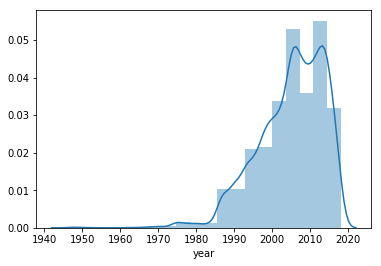

In [59]:
sns.distplot(df['year'], bins = 20)

In [61]:
df['year'].min()

1946

In [62]:
df[df['year'] == 1946]

,artist_name,song_title,album_name,song_text,release_date,song_name,year
26673,Hamiyet Yüceses,Kadifeden Kesesi,Her Yer Karanlık,Kadifeden kesesi Kahveden gelir sesi Oturmuş k...,1946-08-04,Kadifeden Kesesi,1946
